# Visualizing the progress of a language migration

or: how to show non-developers that we're working under the hood of a software system successfully

### Read in the data from Git log

In [1]:
import pandas as pd

log = pd.read_csv("../dataset/angular_file_commit_history.csv", parse_dates=[1])
log.head()

,sha,timestamp,action,file_path
0,10c5cdb49c51c95086febd37f4d88a9b944d7e1c,2024-02-22 10:26:20,A,packages/core/src/util/callback_scheduler.ts
1,10c5cdb49c51c95086febd37f4d88a9b944d7e1c,2024-02-22 10:26:20,D,packages/core/src/util/raf.ts
2,83932aa85e63311b1e85c8c61f4a1ebded39c4f1,2024-03-06 13:30:37,D,packages/compiler/src/template/pipeline/src/ph...
3,83932aa85e63311b1e85c8c61f4a1ebded39c4f1,2024-03-06 13:30:37,A,packages/compiler/src/template/pipeline/src/ph...
4,5ae2bf480697b475c41ea136f08f4dca633c75b9,2024-03-08 13:39:57,A,packages/compiler-cli/test/compliance/test_cas...


### Get the info about the programming language used

In [2]:
log['lang'] = log['file_path'].str.rsplit(".", n=1).str[-1]
log.head()

,sha,timestamp,action,file_path,lang
0,10c5cdb49c51c95086febd37f4d88a9b944d7e1c,2024-02-22 10:26:20,A,packages/core/src/util/callback_scheduler.ts,ts
1,10c5cdb49c51c95086febd37f4d88a9b944d7e1c,2024-02-22 10:26:20,D,packages/core/src/util/raf.ts,ts
2,83932aa85e63311b1e85c8c61f4a1ebded39c4f1,2024-03-06 13:30:37,D,packages/compiler/src/template/pipeline/src/ph...,ts
3,83932aa85e63311b1e85c8c61f4a1ebded39c4f1,2024-03-06 13:30:37,A,packages/compiler/src/template/pipeline/src/ph...,ts
4,5ae2bf480697b475c41ea136f08f4dca633c75b9,2024-03-08 13:39:57,A,packages/compiler-cli/test/compliance/test_cas...,ts


### Map added and deleted lines to numbers

In [3]:
log.loc[log['action'] == "A", "count"] = 1
log.loc[log['action'] == "D", "count"] = -1
log.head()

,sha,timestamp,action,file_path,lang,count
0,10c5cdb49c51c95086febd37f4d88a9b944d7e1c,2024-02-22 10:26:20,A,packages/core/src/util/callback_scheduler.ts,ts,1.0
1,10c5cdb49c51c95086febd37f4d88a9b944d7e1c,2024-02-22 10:26:20,D,packages/core/src/util/raf.ts,ts,-1.0
2,83932aa85e63311b1e85c8c61f4a1ebded39c4f1,2024-03-06 13:30:37,D,packages/compiler/src/template/pipeline/src/ph...,ts,-1.0
3,83932aa85e63311b1e85c8c61f4a1ebded39c4f1,2024-03-06 13:30:37,A,packages/compiler/src/template/pipeline/src/ph...,ts,1.0
4,5ae2bf480697b475c41ea136f08f4dca633c75b9,2024-03-08 13:39:57,A,packages/compiler-cli/test/compliance/test_cas...,ts,1.0


### Group changes to weekly numbers

In [4]:
log_timed = log.groupby([pd.Grouper(key="timestamp", freq="1w"), "lang"])['count'].sum()
log_timed.head()

timestamp   lang
2014-09-21  js      24.0
2014-09-28  js      21.0
2014-10-05  js      22.0
2014-10-12  js       5.0
2014-10-19  js       6.0
Name: count, dtype: float64

### Calculate data for showing the progress

In [5]:
log_timed_unstacked = log_timed.unstack().fillna(0).cumsum()
log_timed_unstacked.head()

lang,js,ts
timestamp,,
2014-09-21,24.0,0.0
2014-09-28,45.0,0.0
2014-10-05,67.0,0.0
2014-10-12,72.0,0.0
2014-10-19,78.0,0.0


### Visualize the progress of the migration

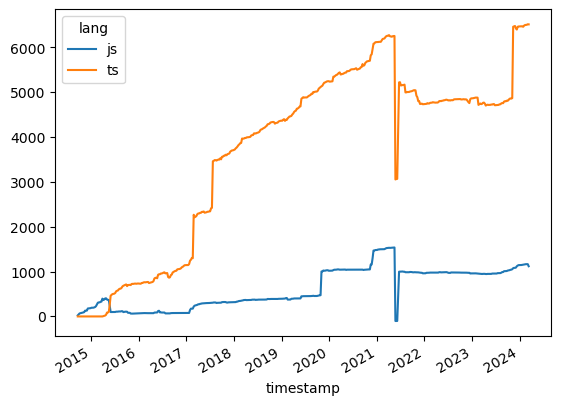

In [6]:
log_timed_unstacked.plot();

### Get into more details regarding the first migration

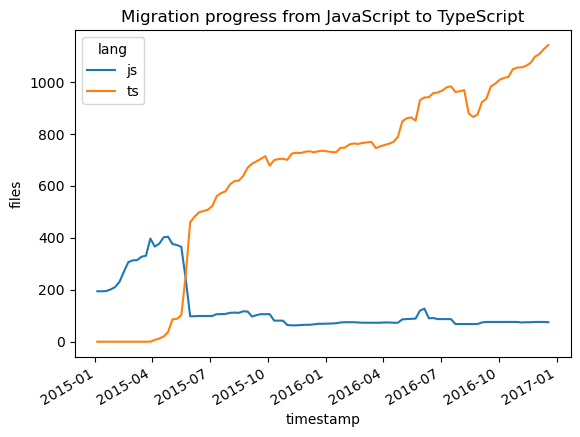

In [7]:
log_timed_unstacked.loc['2015':'2016'].plot(title="Migration progress from JavaScript to TypeScript", ylabel="files");

### End